## Imports

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import h2o

## 00 Loading data

In [363]:
data_path="../data/"

folders = ["A", "B", "C"]
dataframes = {f : {} for f in folders}
for folder in folders:
    for file in os.listdir(data_path + folder + "/"):
        filename=file.split(".")[0]
        dataframes[folder][filename]=pd.read_parquet(data_path + folder + "/"+ file)
df_selected_test_rows = pd.read_csv('../data/test.csv')
#iterates through dataframes
for folder, files_dict in dataframes.items():
    print(f"Folder: {folder}")
    for filename in files_dict.keys():
        print(f"  File: {filename}  Shape:  {files_dict[filename].shape}")

Folder: A
  File: train_targets  Shape:  (34085, 2)
  File: X_test_estimated  Shape:  (2880, 47)
  File: X_train_estimated  Shape:  (17576, 47)
  File: X_train_observed  Shape:  (118669, 46)
Folder: B
  File: train_targets  Shape:  (32848, 2)
  File: X_test_estimated  Shape:  (2880, 47)
  File: X_train_estimated  Shape:  (17576, 47)
  File: X_train_observed  Shape:  (116929, 46)
Folder: C
  File: train_targets  Shape:  (32155, 2)
  File: X_test_estimated  Shape:  (2880, 47)
  File: X_train_estimated  Shape:  (17576, 47)
  File: X_train_observed  Shape:  (116825, 46)


##### Selected test rows

In [364]:
df_selected_test_rows = pd.read_csv('../data/test.csv')

## 01 EDA

##### Creating and storing the dataframes

In [431]:
X_train_observed_A_EDA = dataframes['A']['X_train_observed']
X_train_estimated_A_EDA = dataframes['A']['X_train_estimated']
X_test_estimated_A_EDA = dataframes['A']['X_test_estimated']
train_targets_A_EDA = dataframes['A']['train_targets']

X_train_observed_B_EDA = dataframes['B']['X_train_observed']
X_train_estimated_B_EDA = dataframes['B']['X_train_observed']
X_test_estimated_B_EDA = dataframes['B']['X_test_estimated']
train_targets_B_EDA = dataframes['B']['train_targets']

X_train_observed_C_EDA = dataframes['C']['X_train_observed']
X_train_estimated_C_EDA = dataframes['C']['X_train_observed']
X_test_estimated_C_EDA = dataframes['C']['X_test_estimated']
train_targets_C_EDA = dataframes['C']['train_targets']


In [432]:
# Merge X_train_observed_A with train_targets_A
merged_observed_A = pd.merge(X_train_observed_A_EDA, train_targets_A_EDA,
                             left_on='date_forecast',
                             right_on='time',
                             how='inner')

# Merge X_train_estimated_A with train_targets_A
merged_estimated_A = pd.merge(X_train_estimated_A_EDA, train_targets_A_EDA,
                              left_on='date_forecast',
                              right_on='time',
                              how='inner')
#B
merged_observed_B = pd.merge(X_train_observed_B_EDA, train_targets_B_EDA,
                             left_on='date_forecast',
                             right_on='time',
                             how='inner')

# Merge X_train_estimated_A with train_targets_A
merged_estimated_B = pd.merge(X_train_estimated_B_EDA, train_targets_B_EDA,
                              left_on='date_forecast',
                              right_on='time',
                              how='inner')
#C
merged_observed_C = pd.merge(X_train_observed_C_EDA, train_targets_C_EDA,
                             left_on='date_forecast',
                             right_on='time',
                             how='inner')

# Merge X_train_estimated_A with train_targets_A
merged_estimated_C = pd.merge(X_train_estimated_C_EDA, train_targets_C_EDA,
                              left_on='date_forecast',
                              right_on='time',
                              how='inner')

#### Histogram of features
We plotted a histogram of all the features for A, B and C. From here we identified their distribution and saw which features had little or no variation. We used this to see which features to drop at a later stage. For instance we saw that there was little variation in some of the snow attributes, which we decided to drop later.

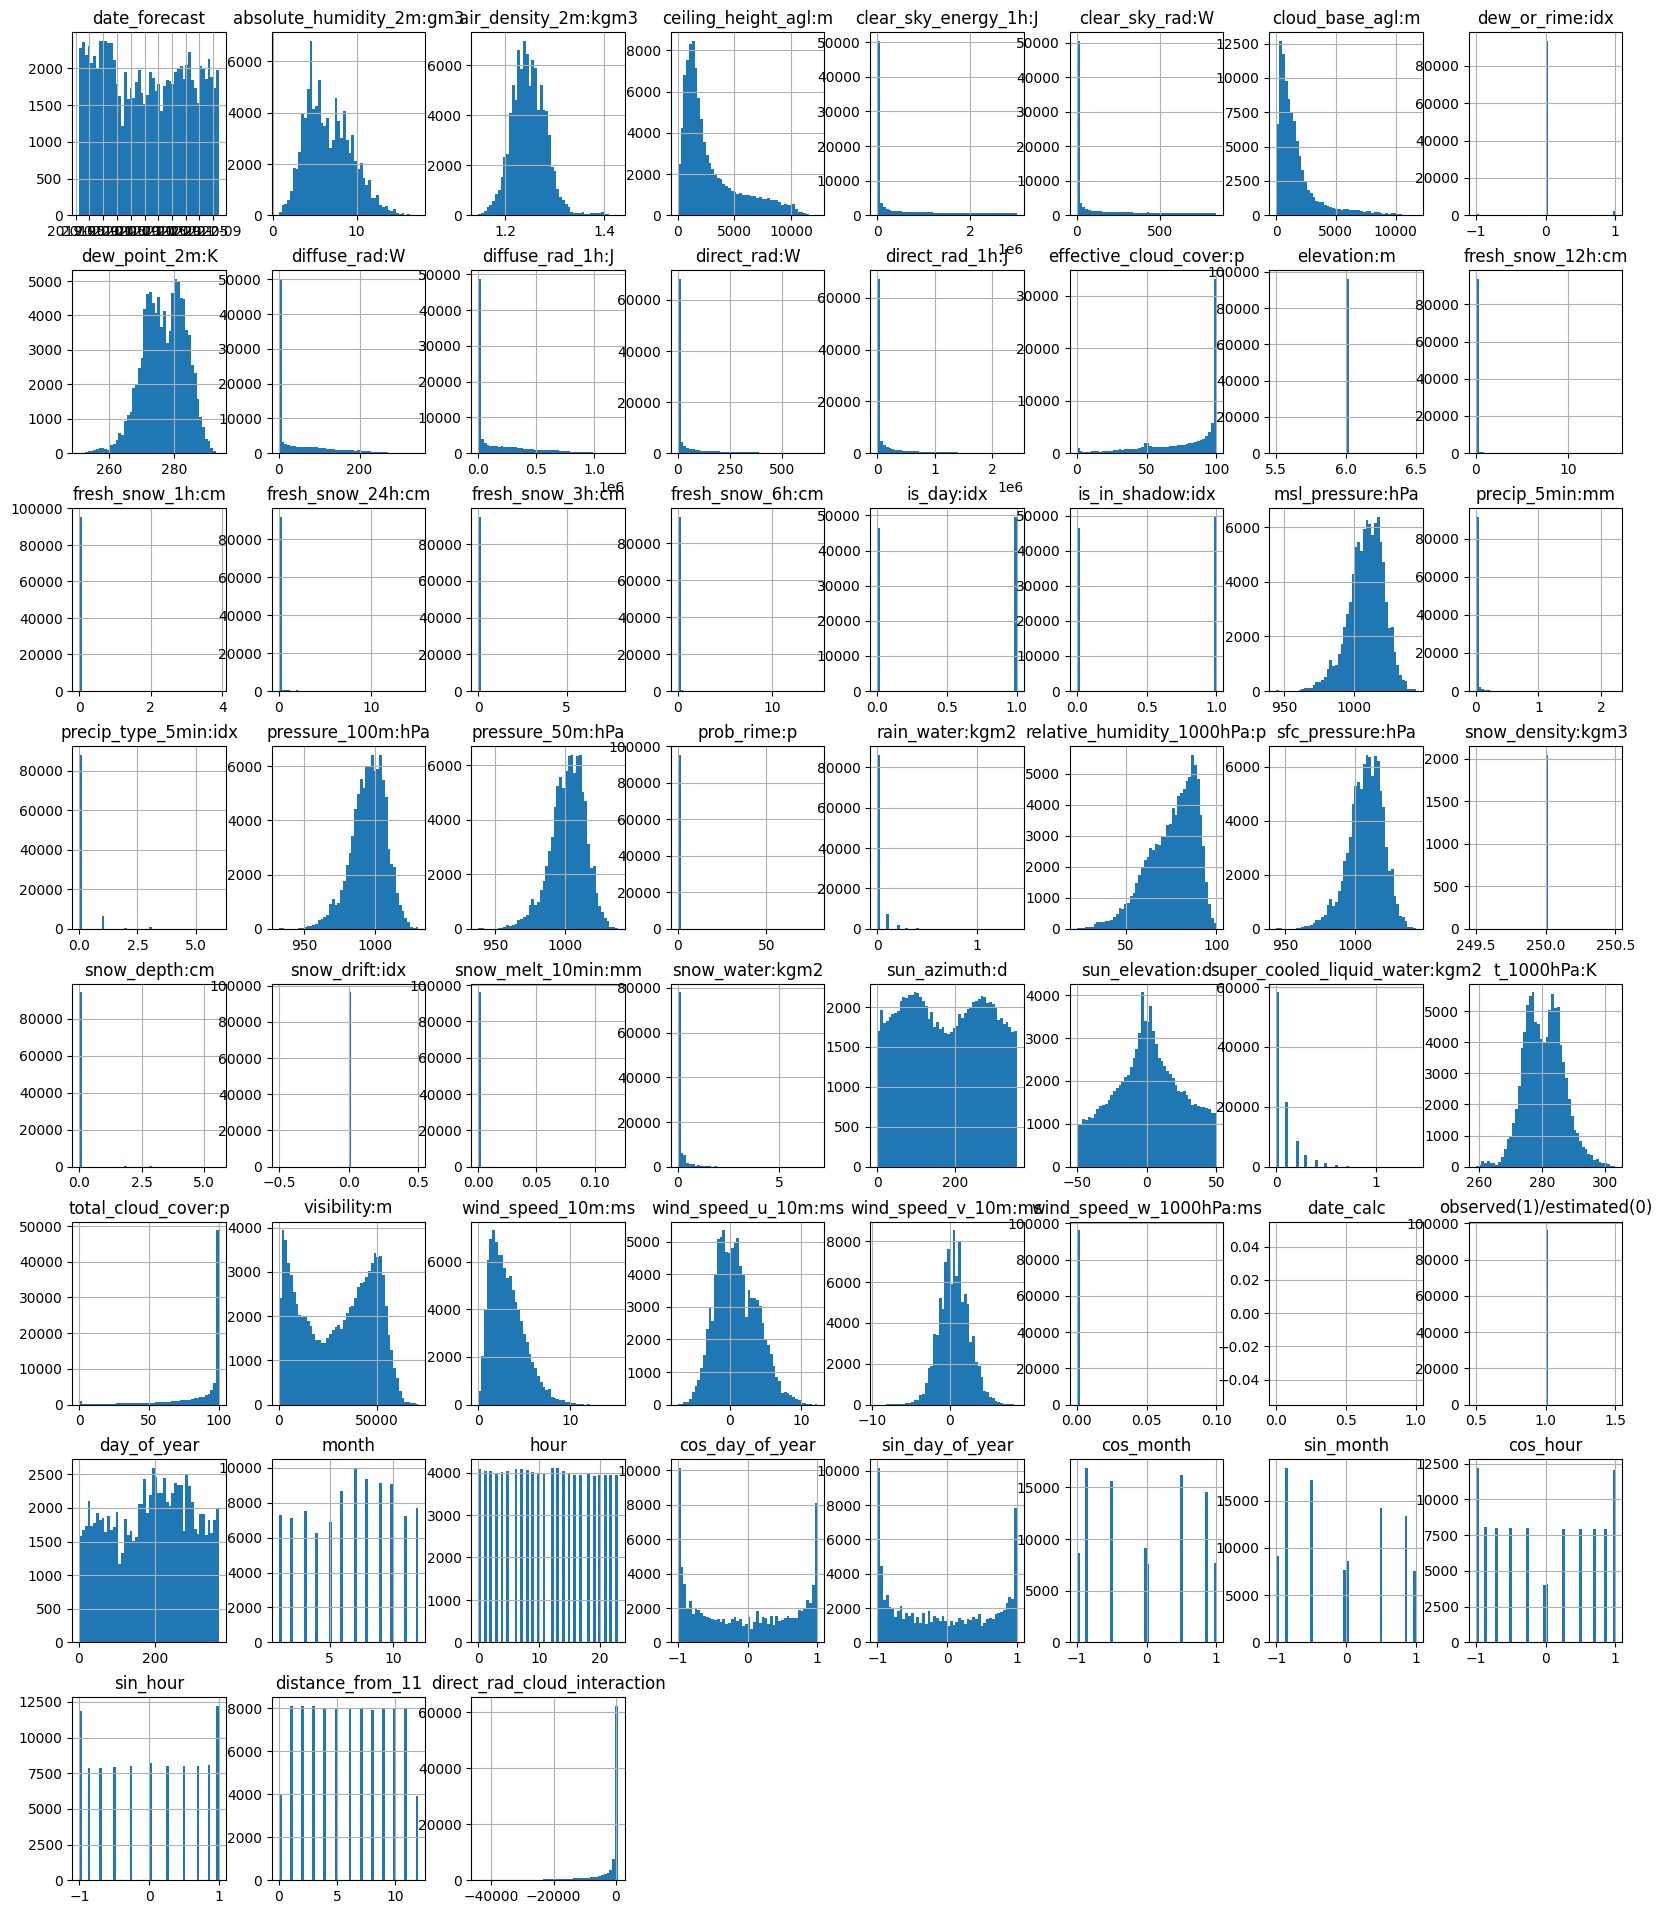

In [429]:
X_train_observed_A_EDA.hist(bins=50, figsize=(20,24))
#plt.show();
# X_train_observed_A.hist(bins=50, figsize=(20,24))
# plt.show();
# X_train_observed_A.hist(bins=50, figsize=(20,24))
# plt.show();

## 02 Clean data

##### In this section we cleaned data based on the findings in the EDA

### NaN values -columns

##### X_train_observed


In [365]:
filename = "X_train_observed"
for location in ['A','B','C']:
    #for filename in files_dict.keys():
    string = dataframes[location][filename].isna().sum().sort_values(ascending = False).head()
    print(f'Nans for  {filename} {location}  :\n{string}')

Nans for  X_train_observed A  :
snow_density:kgm3       115945
ceiling_height_agl:m     22247
cloud_base_agl:m          8066
date_forecast                0
snow_water:kgm2              0
dtype: int64
Nans for  X_train_observed B  :
snow_density:kgm3       111201
ceiling_height_agl:m     18772
cloud_base_agl:m          7473
date_forecast                0
snow_water:kgm2              0
dtype: int64
Nans for  X_train_observed C  :
snow_density:kgm3       107593
ceiling_height_agl:m     19923
cloud_base_agl:m          8512
date_forecast                0
snow_water:kgm2              0
dtype: int64


##### X_train_estimated

In [366]:
filename = "X_train_estimated"
for location in ['A','B','C']:
    #for filename in files_dict.keys():
    string = dataframes[location][filename].isna().sum().sort_values(ascending = False).head()
    print(f'Nans for  {filename} {location}  :\n{string}')

Nans for  X_train_estimated A  :
snow_density:kgm3       15769
ceiling_height_agl:m     3919
cloud_base_agl:m         2094
date_calc                   0
snow_water:kgm2             0
dtype: int64
Nans for  X_train_estimated B  :
snow_density:kgm3       15713
ceiling_height_agl:m     3689
cloud_base_agl:m         1963
date_calc                   0
snow_water:kgm2             0
dtype: int64
Nans for  X_train_estimated C  :
snow_density:kgm3       13898
ceiling_height_agl:m     4596
cloud_base_agl:m         2804
date_calc                   0
snow_water:kgm2             0
dtype: int64


##### X_test_estimated


In [367]:
filename = "X_test_estimated"
for location in ['A','B','C']:
    #for filename in files_dict.keys():
    string = dataframes[location][filename].isna().sum().sort_values(ascending = False).head()
    print(f'Nans for  {filename} {location}  :\n{string}')


Nans for  X_test_estimated A  :
snow_density:kgm3       2880
ceiling_height_agl:m     793
cloud_base_agl:m         298
date_calc                  0
snow_water:kgm2            0
dtype: int64
Nans for  X_test_estimated B  :
snow_density:kgm3       2880
ceiling_height_agl:m     755
cloud_base_agl:m         277
date_calc                  0
snow_water:kgm2            0
dtype: int64
Nans for  X_test_estimated C  :
snow_density:kgm3       2880
ceiling_height_agl:m     849
cloud_base_agl:m         375
date_calc                  0
snow_water:kgm2            0
dtype: int64


##### train_targets


In [368]:
filename = "train_targets"
for location in ['A','B','C']:
    #for filename in files_dict.keys():
    string = dataframes[location][filename].isna().sum().sort_values(ascending = False).head()
    print(f'Nans for  {filename} {location}  :\n{string}')

Nans for  train_targets A  :
time              0
pv_measurement    0
dtype: int64
Nans for  train_targets B  :
pv_measurement    4
time              0
dtype: int64
Nans for  train_targets C  :
pv_measurement    6060
time                 0
dtype: int64


### Removing rows with NaN for PV for C

In [369]:
filename = "train_targets"
for location in ['A','B','C']:
    #for filename in files_dict.keys():
    string = dataframes[location][filename].isna().sum().sort_values(ascending = False).head()
    print(f'Nans for  {filename} {location}  :\n{string}')
    dataframes[location][filename] = dataframes[location][filename].dropna(subset=['pv_measurement'])

Nans for  train_targets A  :
time              0
pv_measurement    0
dtype: int64
Nans for  train_targets B  :
pv_measurement    4
time              0
dtype: int64
Nans for  train_targets C  :
pv_measurement    6060
time                 0
dtype: int64


### Removing rows with NaN for ceiling_height cloud_base and PV

In [370]:
### Remove in feature engineering
# snow density -> remove column
# ceiligh height -> remove rows with ceiling height = NaN
# cloud base -> remove rows with cloud base = NaN
# pv-values -> remove rows where PV = 0
def remove_nan_rows(df, columns):
    # Drop rows where any of the specified columns have NaN values
    clean_df = df.dropna(subset=columns)
    return clean_df

#cleaned_data = remove_nan_rows(data, ['ceiling_height_agl:m', 'cloud_base_agl:m'])
for folder, files_dict in dataframes.items():
    for filename in ['X_train_observed','X_train_estimated']:#files_dict.keys():
        if (filename != 'train_targets') and (filename != 'X_test_estimated'):
            dataframes[folder][filename] = remove_nan_rows(dataframes[folder][filename], ['ceiling_height_agl:m', 'cloud_base_agl:m'])
        else:
            dataframes[folder][filename] = remove_nan_rows(dataframes[folder][filename], ['pv_measurement'])

### Saving as dataframes

### Saving as dfs

In [371]:
X_train_observed_A = dataframes['A']['X_train_observed']
X_train_estimated_A = dataframes['A']['X_train_estimated']
X_test_estimated_A = dataframes['A']['X_test_estimated']
train_targets_A = dataframes['A']['train_targets']

#A_X_dfs = [X_train_observed_A, X_train_estimated_A, X_test_estimated_A]

X_train_observed_B = dataframes['B']['X_train_observed']
X_train_estimated_B = dataframes['B']['X_train_observed']
X_test_estimated_B = dataframes['B']['X_test_estimated']
train_targets_B = dataframes['B']['train_targets']

#B_X_dfs = [X_train_observed_B, X_train_estimated_B, X_test_estimated_B]

X_train_observed_C = dataframes['C']['X_train_observed']
X_train_estimated_C = dataframes['C']['X_train_observed']
X_test_estimated_C = dataframes['C']['X_test_estimated']
train_targets_C = dataframes['C']['train_targets']

#C_X_dfs = [X_train_observed_C, X_train_estimated_C, X_test_estimated_C]

## 03 Feature engineering

In [372]:
### Adding date_calc = NaN to observed values
X_train_observed_A['date_calc'] = np.nan
X_train_observed_B['date_calc'] = np.nan
X_train_observed_C['date_calc'] = np.nan

##### Observed/estimated and fill date_calc with date_forecast

In [373]:
### Adding observed and estimated feature
def add_observed_estimated_category(df):
    ### Adding attribute "estimated" og "observed"
    #df["observed/estimated"] = np.where(pd.isna(df['date_calc']), 0, 1) #observed = 0, estimated = 1
    df['observed(1)/estimated(0)'] = df['date_calc'].isna().astype(int)
    return df

### Fill observed weather's Na values with "date_forecast"
def fill_date_calc_w_date_forecast(df):
    df["date_calc"]= df["date_calc"].fillna(df["date_forecast"])
    return df


##### Add hour, day, month

Added time features to help the model understand what day in the year it is. As this is periodic feature, we got better results when we took the sine and cosine of the time values.

In [374]:
import pandas as pd
import numpy as np

def create_time_features(df, date_column='date_forecast'):
    df[date_column] = pd.to_datetime(df[date_column])
    # Day of year
    df['day_of_year'] = df[date_column].dt.dayofyear
    # Month
    df['month'] = df[date_column].dt.month
    # Hour
    df['hour'] = df[date_column].dt.hour

    # Create cos and sin components for cyclic nature of time
    df['cos_day_of_year'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)
    df['sin_day_of_year'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)

    df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)
    df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
    df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)

    return df



##### Sun features

In [377]:
#df_train.describe()
def add_normalized_distance_from_middle(df):
    max_distance = 12
    df['distance_from_11'] = abs(df['hour'] - 11)
    return df
month_mapping = { 'January': 1,    'February': 2,    'March': 3,    'April': 4,    'May': 5,    'June': 6,    'July': 7,
'August': 6,    'September': 5,    'October': 4,    'November': 3,    'December': 2}

def add_sun_features(df):
    #df['elevation_cloud_interaction'] = df['sun_elevation:d'] * df['effective_cloud_cover:p']
    df['direct_rad_cloud_interaction'] = df['direct_rad:W'] * (1- df['effective_cloud_cover:p'])
    #df['cos_elevation'] = np.cos(np.radians(90 - df['sun_elevation:d']))
    #df['sun_elevation_squared'] = df['sun_elevation:d'] ** 2
    #df['sun_elevation_month_interaction'] = df['sun_elevation:d'] * df['month'].map(month_mapping)
    return df

### Adding features

In [378]:
def add_all_features(df):
    add_observed_estimated_category(df)
    create_time_features(df)
    add_normalized_distance_from_middle(df)
    add_sun_features(df)
    return df

###### Adding features function

In [379]:
print(X_train_observed_A.shape)

X_train_observed_A = add_all_features(X_train_observed_A)
X_train_estimated_A = add_all_features(X_train_estimated_A)
X_test_estimated_A = add_all_features(X_test_estimated_A)
X_train_observed_B = add_all_features(X_train_observed_B)
X_train_estimated_B = add_all_features(X_train_estimated_B)
X_test_estimated_B = add_all_features(X_test_estimated_B)
X_train_observed_C = add_all_features(X_train_observed_C)
X_train_estimated_C = add_all_features(X_train_estimated_C)
X_test_estimated_C = add_all_features(X_test_estimated_C)

print(X_train_observed_A.shape)


(96177, 47)
(96177, 59)


In [380]:
X_train_observed_A.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

### Dropping features

##### Features to drop

In [381]:
keywords = [
    'snow_density', 'elevation'
]

##### Dropping features function

In [382]:
def drop_columns_from_df(df, keywords_to_drop):
    cols_to_drop = [col for col in df.columns if any(keyword in col for keyword in keywords_to_drop)]
    df = df.drop(columns=cols_to_drop)
    return df

In [383]:
X_train_observed_A = drop_columns_from_df(X_train_observed_A, keywords)
X_train_estimated_A = drop_columns_from_df(X_train_estimated_A, keywords)
X_test_estimated_A = drop_columns_from_df(X_test_estimated_A, keywords)
X_train_observed_B = drop_columns_from_df(X_train_observed_B, keywords)
X_train_estimated_B = drop_columns_from_df(X_train_estimated_B, keywords)
X_test_estimated_B = drop_columns_from_df(X_test_estimated_B, keywords)
X_train_observed_C = drop_columns_from_df(X_train_observed_C, keywords)
X_train_estimated_C = drop_columns_from_df(X_train_estimated_C, keywords)
X_test_estimated_C = drop_columns_from_df(X_test_estimated_C, keywords)

In [384]:
print(X_train_observed_A.shape)
X_train_observed_A.columns

(96177, 56)


Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm',
       'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm',
       'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p',
       'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms',
       'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms', 'date_calc'

**Try merging for every 15 minutes, or mean, here!**

## 04 Preparing data for model

##### Merging training and targets for observed and estimated

In [385]:
# Merge X_train_observed_A with train_targets_A
merged_observed_A = pd.merge(X_train_observed_A, train_targets_A,
                             left_on='date_forecast',
                             right_on='time',
                             how='inner')

# Merge X_train_estimated_A with train_targets_A
merged_estimated_A = pd.merge(X_train_estimated_A, train_targets_A,
                              left_on='date_forecast',
                              right_on='time',
                              how='inner')
#B
merged_observed_B = pd.merge(X_train_observed_B, train_targets_B,
                             left_on='date_forecast',
                             right_on='time',
                             how='inner')

# Merge X_train_estimated_A with train_targets_A
merged_estimated_B = pd.merge(X_train_estimated_B, train_targets_B,
                              left_on='date_forecast',
                              right_on='time',
                              how='inner')
#C
merged_observed_C = pd.merge(X_train_observed_C, train_targets_C,
                             left_on='date_forecast',
                             right_on='time',
                             how='inner')

# Merge X_train_estimated_A with train_targets_A
merged_estimated_C = pd.merge(X_train_estimated_C, train_targets_C,
                              left_on='date_forecast',
                              right_on='time',
                              how='inner')

##### Converting to numeric time format

###### Conversion code

In [386]:

def preprocess_dataframe(df, time_col, date_cols):
    """
    Preprocess the dataframe by removing the time column and converting date columns to numeric values.

    Parameters:
    df (pd.DataFrame): The DataFrame to preprocess.
    time_col (str): The name of the time column to remove.
    date_cols (list): A list of date column names to convert to numeric.

    Returns:
    pd.DataFrame: The preprocessed DataFrame.
    """
    # Remove the time column
    if not time_col == 'testing':
        df = df.drop(columns=[time_col])

    # Convert 'date_forecast' and 'date_calc' to numeric (epoch time)
    for date_col in date_cols:
        # Ensure the column is in datetime format
        df[date_col] = pd.to_datetime(df[date_col])

        # Convert datetime to numeric (epoch time)
        df[date_col] = (df[date_col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

    return df

merged_observed_A = preprocess_dataframe(merged_observed_A, 'time', ['date_forecast', 'date_calc'])
merged_estimated_A = preprocess_dataframe(merged_estimated_A, 'time', ['date_forecast', 'date_calc'])
X_test_estimated_A = preprocess_dataframe(X_test_estimated_A, 'testing', ['date_forecast', 'date_calc'])

merged_observed_B = preprocess_dataframe(merged_observed_B, 'time', ['date_forecast', 'date_calc'])
merged_estimated_B = preprocess_dataframe(merged_estimated_B, 'time', ['date_forecast', 'date_calc'])
X_test_estimated_B = preprocess_dataframe(X_test_estimated_B, 'testing', ['date_forecast', 'date_calc'])

merged_observed_C = preprocess_dataframe(merged_observed_C, 'time', ['date_forecast', 'date_calc'])
merged_estimated_C = preprocess_dataframe(merged_estimated_C, 'time', ['date_forecast', 'date_calc'])
X_test_estimated_C = preprocess_dataframe(X_test_estimated_C, 'testing', ['date_forecast', 'date_calc'])

##### Removing weird PV for B

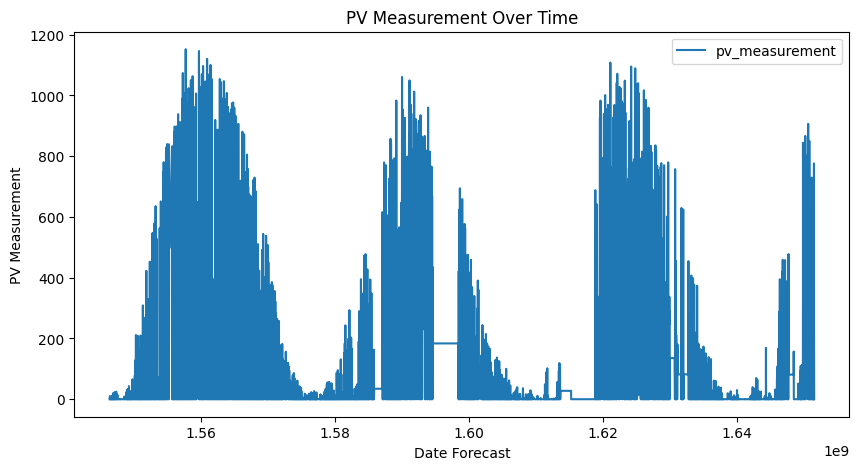

In [387]:

# Assuming 'merged_estimated_B' is a DataFrame and 'date_forecast' is in a proper datetime format
merged_estimated_B.plot(x='date_forecast', y='pv_measurement', figsize=(10,5))
# Labeling the axes
plt.xlabel('Date Forecast')
plt.ylabel('PV Measurement')
# Title for the plot
plt.title('PV Measurement Over Time')
plt.show()


Text(0.5, 1.0, 'PV Measurement Over Time (Filtered)')

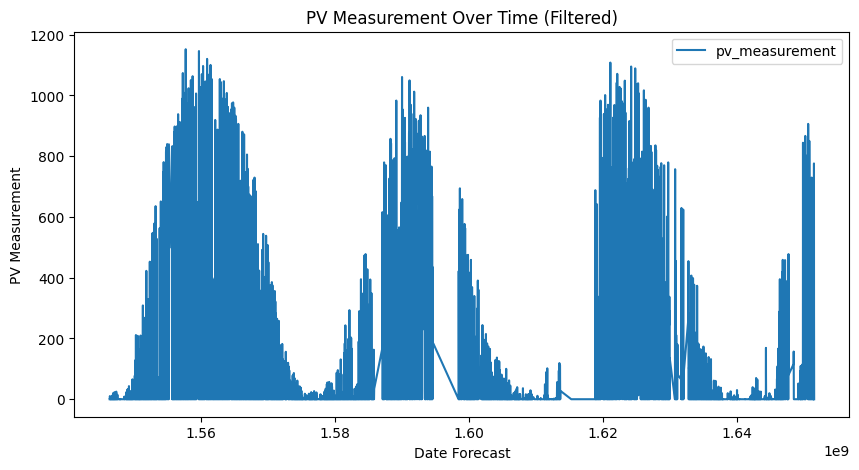

In [388]:
def remove_constant_nonzero_rows(df, column_name, min_consecutive=1):
    # Identify rows where the value in the specified column stays constant for the given minimum number of consecutive rows
    # And where the value is not 0
    mask = df[column_name].rolling(window=min_consecutive, center=False).apply(
        lambda x: (x.nunique() == 1) and (x.iloc[0] != 0)
    )
    # Filter out the constant non-zero rows
    df_filtered = df[mask != 1]
    return df_filtered


# Usage
min_consecutive = 6  # Define the minimum number of consecutive rows with the same value to be removed
#merged_estimated_B_filtered = remove_constant_nonzero_rows(merged_estimated_B, 'pv_measurement', min_consecutive)
merged_estimated_B = remove_constant_nonzero_rows(merged_estimated_B, 'pv_measurement', min_consecutive)

# Now you can plot the filtered DataFrame
merged_estimated_B.plot(x='date_forecast', y='pv_measurement', figsize=(10,5))
plt.xlabel('Date Forecast')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time (Filtered)')
#plt.show()


##### Removing weird PV for B

In [389]:
# # Assuming 'merged_estimated_B' is a DataFrame and 'date_forecast' is in a proper datetime format
# merged_estimated_C.plot(x='date_forecast', y='pv_measurement', figsize=(10,5))
# # Labeling the axes
# plt.xlabel('Date Forecast')
# plt.ylabel('PV Measurement')
# # Title for the plot
# plt.title('PV Measurement Over Time')
# #plt.show()


Text(0.5, 1.0, 'PV Measurement Over Time (Filtered)')

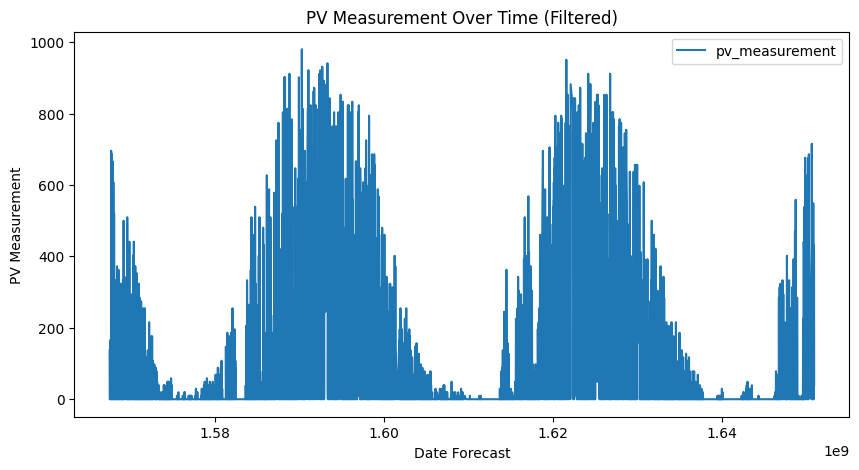

In [390]:
min_consecutive = 6  # Define the minimum number of consecutive rows with the same value to be removed
merged_estimated_C_filtered = remove_constant_nonzero_rows(merged_estimated_C, 'pv_measurement', min_consecutive)

# Now you can plot the filtered DataFrame
merged_estimated_C_filtered.plot(x='date_forecast', y='pv_measurement', figsize=(10,5))
plt.xlabel('Date Forecast')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time (Filtered)')
#plt.show()


##### Splitting into X and y

In [391]:
#Training data and validation data
#A
X_observed_for_training_A = merged_observed_A.drop("pv_measurement", axis = 1)
y_observed_for_training_A = merged_observed_A["pv_measurement"]

X_estimated_for_validation_A = merged_estimated_A.drop("pv_measurement", axis = 1)
y_estimated_validation_data_A = merged_estimated_A["pv_measurement"]
#B
X_observed_for_training_B = merged_observed_B.drop("pv_measurement", axis = 1)
y_observed_for_training_B = merged_observed_B["pv_measurement"]

X_estimated_for_validation_B = merged_estimated_B.drop("pv_measurement", axis = 1)
y_estimated_validation_data_B = merged_estimated_B["pv_measurement"]
#C
X_observed_for_training_C = merged_observed_C.drop("pv_measurement", axis = 1)
y_observed_for_training_C = merged_observed_C["pv_measurement"]

X_estimated_for_validation_C = merged_estimated_C.drop("pv_measurement", axis = 1)
y_estimated_validation_data_C = merged_estimated_C["pv_measurement"]


#### Concatting observed and estimated

In [392]:
### Concating observed and estimated

X_training_A = pd.concat([X_observed_for_training_A, X_estimated_for_validation_A], axis=0)
X_training_A['date_calc'] = X_training_A['date_forecast']
X_training_A.isna().sum().sort_values()
y_training_A = pd.concat([y_observed_for_training_A, y_estimated_validation_data_A], axis=0)
y_training_A = pd.concat([y_observed_for_training_A, y_estimated_validation_data_A], axis=0)


In [393]:
### Concating observed and estimated
X_training_B = pd.concat([X_observed_for_training_B, X_estimated_for_validation_B], axis=0)
X_training_B['date_calc'] = X_training_B['date_forecast']
X_training_B.isna().sum().sort_values()
y_training_B = pd.concat([y_observed_for_training_B, y_estimated_validation_data_B], axis=0)
y_training_B = pd.concat([y_observed_for_training_B, y_estimated_validation_data_B], axis=0)

In [394]:
### Concating observed and estimated
X_training_C = pd.concat([X_observed_for_training_C, X_estimated_for_validation_C], axis=0)
X_training_C['date_calc'] = X_training_C['date_forecast']
X_training_C.isna().sum().sort_values()
y_training_C = pd.concat([y_observed_for_training_C, y_estimated_validation_data_C], axis=0)
y_training_C = pd.concat([y_observed_for_training_C, y_estimated_validation_data_C], axis=0)

## 05 Model training

**TODO - implement tuning**

#### Pipeline construciton

###### Imports

In [395]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, LinearRegression
from catboost import CatBoostRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Linear Models
from sklearn.linear_model import Ridge, Lasso

# Tree-Based Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Neural Networks (MLP from sklearn)
from sklearn.neural_network import MLPRegressor

# For LSTM you would need Keras (or another deep learning library like PyTorch)
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Support Vector Machine
from sklearn.svm import SVR

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor



##### Preprocessor

In [396]:
list_of_numerical_features = X_train_observed_A.select_dtypes(include=['number']).columns.tolist()
list_of_categorical_features = X_train_observed_A.select_dtypes(exclude=['number']).columns.tolist()
print("Numerical features:", list_of_numerical_features)
print("Non-numerical features:", list_of_categorical_features)

Numerical features: ['absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms', 'date_calc', 'observed(1)/estimated(0)', 'day_of_year', 'month', 'hour', 'cos_day_of_year', 'sin_day_of_y

In [397]:

#Generic numerical transformer

numerical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='mean')),#median')),
    ('scaler', StandardScaler()),#MinMaxScaler() #RobustScaler()
    #('ceiling_hegiht_imputer', SimpleImputer(strategy='constant', fill_value=15000))
    #('cloud_base_agl:m_imputer', SimpleImputer())
])

#Generic categorical transformer
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy= 'constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    
])
# Feature specific transformers - TBD
#...

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, list_of_numerical_features),
        #('cat', categorical_transformer, list_of_categorical_features)
    ]
)

#### Adding sample weights

In [398]:
if False:
    # Define weights - initially all 1
    weights = np.ones(len(X_train))

    # Higher weight for rows where 'month' is 5, 6, or 7
    higher_weight = 2
    weights[X_train['month'].isin([5, 6, 7])] = higher_weight

    # Fit the model with sample weights
    model.fit(X_train, y_train, sample_weight=weights)


#### Individual hyperparameter tuning

In [399]:
if False:
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.linear_model import Ridge
    from lightgbm import LGBMRegressor
    from catboost import CatBoostRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.svm import SVR
    from sklearn.neural_network import MLPRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from scipy.stats import uniform, randint

    # Number of iterations for RandomizedSearchCV to sample
    n_iter_search = 100

    # Ridge Regressor
    ridge_distributions = {'ridge__alpha': uniform(0.1, 10)}
    ridge_random_search = RandomizedSearchCV(make_pipeline(preprocessor, Ridge()), 
                                            param_distributions=ridge_distributions, 
                                            n_iter=n_iter_search, cv=5, verbose=1)
    ridge_random_search.fit(X_training_A, y_training_A)
    best_ridge_params = ridge_random_search.best_params_
    print(best_ridge_params)
    # LightGBM Regressor
    lgbm_distributions = {
        'lgbmregressor__num_leaves': randint(20, 50),
        'lgbmregressor__max_depth': randint(-1, 20),
        # Add more hyperparameters here
    }
    lgbm_random_search = RandomizedSearchCV(make_pipeline(preprocessor, LGBMRegressor()), 
                                            param_distributions=lgbm_distributions, 
                                            n_iter=n_iter_search, cv=5, verbose=1)
    lgbm_random_search.fit(X_training_A, y_training_A)
    best_lgbm_params = lgbm_random_search.best_params_

    # CatBoost Regressor
    catboost_distributions = {
        'catboostregressor__learning_rate': uniform(0.01, 0.3),
        'catboostregressor__depth': randint(4, 10),
        # Add more hyperparameters here
    }
    catboost_random_search = RandomizedSearchCV(make_pipeline(preprocessor, CatBoostRegressor(iterations=10000, loss_function='LogCosh', verbose=1000)), 
                                                param_distributions=catboost_distributions, 
                                                n_iter=n_iter_search, cv=5, verbose=1)
    catboost_random_search.fit(X_training_A, y_training_A)
    best_catboost_params = catboost_random_search.best_params_

    # RandomForest Regressor
    rf_distributions = {
        'randomforestregressor__max_depth': randint(3, 20),
        'randomforestregressor__min_samples_split': randint(2, 11),
        # Add more hyperparameters here
    }
    rf_random_search = RandomizedSearchCV(make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42)), 
                                        param_distributions=rf_distributions, 
                                        n_iter=n_iter_search, cv=5, verbose=1)
    rf_random_search.fit(X_training_A, y_training_A)
    best_rf_params = rf_random_search.best_params_

    # SVR
    svr_distributions = {
        'svr__C': uniform(0.1, 10),
        'svr__gamma': ['scale', 'auto'],
        # Add more hyperparameters here
    }
    svr_random_search = RandomizedSearchCV(make_pipeline(preprocessor, SVR()), 
                                        param_distributions=svr_distributions, 
                                        n_iter=n_iter_search, cv=5, verbose=1)
    svr_random_search.fit(X_training_A, y_training_A)
    best_svr_params = svr_random_search.best_params_

    # MLPRegressor
    mlp_distributions = {
        'mlpregressor__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
        'mlpregressor__alpha': uniform(0.0001, 0.1),
        # Add more hyperparameters here
    }
    mlp_random_search = RandomizedSearchCV(make_pipeline(preprocessor, MLPRegressor()), 
                                        param_distributions=mlp_distributions, 
                                        n_iter=n_iter_search, cv=5, verbose=1)
    mlp_random_search.fit(X_training_A, y_training_A)
    best_mlp_params = mlp_random_search.best_params_

    # KNeighbors Regressor
    knr_distributions = {
        'kneighborsregressor__n_neighbors': randint(3, 30),
        'kneighborsregressor__weights': ['uniform', 'distance'],
        # Add more hyperparameters here
    }
    knr_random_search = RandomizedSearchCV(make_pipeline(preprocessor, KNeighborsRegressor()), 
                                        param_distributions=knr_distributions, 
                                        n_iter=n_iter_search, cv=5, verbose=1)
    knr_random_search.fit(X_training_A, y_training_A)
    best_knr_params = knr_random_search.best_params_

    # modelsHyperParameterTuned = [
#     ('rr', make_pipeline(preprocessor, Ridge(**best_ridge_params))),
#     ('lr', make_pipeline(preprocessor, LGBMRegressor(**best_lgbm_params))),
#     ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=10000, loss_function='LogCosh', verbose= 1000)))#(**best_catboost_params))),
#     ('rf', make_pipeline(preprocessor, RandomForestRegressor(**best_rf_params))),
#     ('svr', make_pipeline(preprocessor, SVR(**best_svr_params))),
#     ('mlp', make_pipeline(preprocessor, MLPRegressor(**best_mlp_params))),
#     ('knr', make_pipeline(preprocessor, KNeighborsRegressor(**best_knr_params)))
# ]


### Models

In [400]:
fit_and_cross_val_models = True

## A

##### Models to be stacked

In [401]:
# Define base models
modelsNotTuned = [
    ('rr', make_pipeline(preprocessor, Ridge())),
    ('lr', make_pipeline(preprocessor, LGBMRegressor())),
    ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=10000, loss_function='LogCosh', verbose= 1000))),#(**best_catboost_params))),
    ('rf', make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))),
    ('svr', make_pipeline(preprocessor, SVR())),
    ('mlp', make_pipeline(preprocessor, MLPRegressor())),
    ('knr', make_pipeline(preprocessor, KNeighborsRegressor()))
]

modelsNotTuned2 = [
    ('rr', make_pipeline(preprocessor, Ridge())),
    ('lr', make_pipeline(preprocessor, LGBMRegressor())),
    ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=10000, loss_function='LogCosh', verbose= 1000))),#(**best_catboost_params))),
    ('svr', make_pipeline(preprocessor, SVR())),
    ('mlp', make_pipeline(preprocessor, MLPRegressor())),
    ('knr', make_pipeline(preprocessor, KNeighborsRegressor()))
]

modelsNotTuned = [
    ('rr', make_pipeline(preprocessor, XGBRegressor())),
    ('lr', make_pipeline(preprocessor, LGBMRegressor())),
    ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=1600, loss_function='LogCosh', verbose= 1000))),
]

##### Stacked model

In [402]:
# Initialize Stacking Regressor with a meta-regressor
stacked_regressor_A = StackingRegressor(
    estimators = modelsNotTuned,
    final_estimator=LinearRegression()
)
# If you want to transform the target variable, for example, taking the log
# you can use TransformedTargetRegressor
transformed_target_regressor_A = TransformedTargetRegressor(
    regressor=stacked_regressor_A,
    func=np.log1p,  # Function to apply to y before training the regressor
    inverse_func=np.expm1  # Function to apply to the prediction of the regressor
)
# Train the model on your training data
stacked_model_A = transformed_target_regressor_A

##### Model training and k-fold validation

In [403]:
if fit_and_cross_val_models:
    stacked_model_A.fit(X_training_A, y_training_A)#X_estimated_for_validation_A
    #stacked_model_A.fit(X_estimated_for_validation_A, y_estimated_validation_data_A)#X_estimated_for_validation_A

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7464
[LightGBM] [Info] Number of data points in the train set: 26193, number of used features: 53
[LightGBM] [Info] Start training from score 3.002261
0:	learn: 2.5609236	total: 167ms	remaining: 4m 27s


1000:	learn: 0.1017976	total: 14.8s	remaining: 8.86s
1599:	learn: 0.0839027	total: 25.6s	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7437
[LightGBM] [Info] Number of data points in the train set: 20954, number of used features: 53
[LightGBM] [Info] Start training from score 3.008049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7436
[LightGBM] [Info] Number of data points in the train set: 20954, number of used features: 53
[LightGBM] [Info] Start training from score 2.858868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info

In [404]:
if fit_and_cross_val_models:
    # Define the K-fold cross-validator
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform K-fold cross-validation
    cross_val_scores = cross_val_score(transformed_target_regressor_A, X_training_A, y_training_A, cv=kfold, scoring='neg_mean_absolute_error')

    # Output the scores
    print("Cross-validation scores:", cross_val_scores)
    print("Mean score:", cross_val_scores.mean())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7436
[LightGBM] [Info] Number of data points in the train set: 20954, number of used features: 53
[LightGBM] [Info] Start training from score 2.995347
0:	learn: 2.5544868	total: 14.5ms	remaining: 23.2s
1000:	learn: 0.1009482	total: 13.3s	remaining: 7.97s
1599:	learn: 0.0824734	total: 21.3s	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7399
[LightGBM] [Info] Number of data points in the train set: 16763, number of used features: 53
[LightGBM] [Info] Start training from score 3.004407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002730 seconds.
You can set `force_col_wise=true` to remove the overhead.

##### Predict on test data

In [405]:
#_A
print(f'All selected test rows shape A, B and C: {df_selected_test_rows.shape}')# <- from test.csv
df_selected_test_rows_A = df_selected_test_rows[df_selected_test_rows['location'] == 'A'].copy()
df_selected_test_rows_A['time'] = pd.to_datetime(df_selected_test_rows_A['time'])
# Convert 'date_forecast' from Unix time to datetime format
X_test_estimated_A['date_forecast'] = pd.to_datetime(X_test_estimated_A['date_forecast'], unit='s')
print(f'Selected test rows A shape: {df_selected_test_rows_A.shape}')

## merge X_test_estimated_A with selected words
selected_rows_for_prediction_A = pd.merge(df_selected_test_rows_A, X_test_estimated_A, left_on='time', right_on='date_forecast')
selected_rows_for_prediction_A = selected_rows_for_prediction_A.drop(columns=['time','prediction','location','id'], axis=1)
print(f'Selected rows for prediction A is: {selected_rows_for_prediction_A.shape}')
y_pred_for_submission_A= stacked_model_A.predict(selected_rows_for_prediction_A)
df_y_pred_A = pd.DataFrame(y_pred_for_submission_A, columns=["Predictions"])
df_y_pred_A['Predictions'].describe()

#Format adjustment
df_y_pred_A['id']=df_y_pred_A.index
df_y_pred_A.columns.values[0] = 'prediction'
cols = df_y_pred_A.columns.tolist()
cols[0], cols[1] = cols[1], cols[0]
df_y_pred_A = df_y_pred_A[cols]

All selected test rows shape A, B and C: (2160, 4)
Selected test rows A shape: (720, 4)
Selected rows for prediction A is: (720, 56)


## B

##### Models to be stacked

In [406]:
# Define base models
modelsNotTuned = [
    ('rr', make_pipeline(preprocessor, Ridge())),
    ('lr', make_pipeline(preprocessor, LGBMRegressor())),
    ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=10000, loss_function='LogCosh', verbose= 1000))),#(**best_catboost_params))),
    ('rf', make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))),
    ('svr', make_pipeline(preprocessor, SVR())),
    ('mlp', make_pipeline(preprocessor, MLPRegressor())),
    ('knr', make_pipeline(preprocessor, KNeighborsRegressor()))
]

modelsNotTuned2 = [
    ('rr', make_pipeline(preprocessor, Ridge())),
    ('lr', make_pipeline(preprocessor, LGBMRegressor())),
    ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=10000, loss_function='LogCosh', verbose= 1000))),#(**best_catboost_params))),
    ('svr', make_pipeline(preprocessor, SVR())),
    ('mlp', make_pipeline(preprocessor, MLPRegressor())),
    ('knr', make_pipeline(preprocessor, KNeighborsRegressor()))
]
modelsNotTuned = [
    ('rr', make_pipeline(preprocessor, XGBRegressor())),
    ('lr', make_pipeline(preprocessor, LGBMRegressor())),
    ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=1600, loss_function='LogCosh', verbose= 1000))),
]

##### Stacked model

In [407]:
# Initialize Stacking Regressor with a meta-regressor
stacked_regressor_B = StackingRegressor(
    estimators = modelsNotTuned,
    final_estimator=LinearRegression()
)
# If you want to transform the target variable, for example, taking the log
# you can use TransformedTargetRegressor
transformed_target_regressor_B = TransformedTargetRegressor(
    regressor=stacked_regressor_B,
    func=np.log1p,  # Function to apply to y before training the regressor
    inverse_func=np.expm1  # Function to apply to the prediction of the regressor
)
# Train the model on your training data
stacked_model_B = transformed_target_regressor_B

##### Model training and k-fold validation

In [408]:
if fit_and_cross_val_models:
    stacked_model_B.fit(X_training_B, y_training_B)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7590
[LightGBM] [Info] Number of data points in the train set: 44893, number of used features: 52
[LightGBM] [Info] Start training from score 1.995576
0:	learn: 1.6376326	total: 37.3ms	remaining: 59.6s
1000:	learn: 0.1077414	total: 23.5s	remaining: 14.1s
1599:	learn: 0.0855691	total: 37.2s	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7523
[LightGBM] [Info] Number of data points in the train set: 35914, number of used features: 52
[LightGBM] [Info] Start training from score 1.979097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002728 seconds.
You can set `force_row_wise=true` to remove the overhead.

In [409]:
if fit_and_cross_val_models:
    # Define the K-fold cross-validator
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform K-fold cross-validation
    cross_val_scores = cross_val_score(transformed_target_regressor_B, X_training_B, y_training_B, cv=kfold, scoring='neg_mean_absolute_error')

    # Output the scores
    print("Cross-validation scores:", cross_val_scores)
    print("Mean score:", cross_val_scores.mean())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7558
[LightGBM] [Info] Number of data points in the train set: 35914, number of used features: 52
[LightGBM] [Info] Start training from score 2.005571
0:	learn: 1.6459307	total: 24.6ms	remaining: 39.3s
1000:	learn: 0.1087091	total: 21.9s	remaining: 13.1s
1599:	learn: 0.0853380	total: 34.6s	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7474
[LightGBM] [Info] Number of data points in the train set: 28731, number of used features: 52
[LightGBM] [Info] Start training from score 1.997687
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005586 se

##### Predict on test data

In [410]:
#_B
print(f'All selected test rows shape A, B and C: {df_selected_test_rows.shape}')# <- from test.csv
df_selected_test_rows_B = df_selected_test_rows[df_selected_test_rows['location'] == 'B'].copy()
df_selected_test_rows_B['time'] = pd.to_datetime(df_selected_test_rows_B['time'])
# Convert 'date_forecast' from Unix time to datetime format
X_test_estimated_B['date_forecast'] = pd.to_datetime(X_test_estimated_B['date_forecast'], unit='s')
print(f'Selected test rows _B shape: {df_selected_test_rows_B.shape}')

## merge X_test_estimated_B with selected words
selected_rows_for_prediction_B = pd.merge(df_selected_test_rows_B, X_test_estimated_B, left_on='time', right_on='date_forecast')
selected_rows_for_prediction_B = selected_rows_for_prediction_B.drop(columns=['time','prediction','location','id'], axis=1)
print(f'Selected rows for prediction B is: {selected_rows_for_prediction_B.shape}')
y_pred_for_submission_B= stacked_model_B.predict(selected_rows_for_prediction_B)
df_y_pred_B = pd.DataFrame(y_pred_for_submission_B, columns=["Predictions"])
df_y_pred_B['Predictions'].describe()

#Format adjustment
df_y_pred_B['id']=df_y_pred_B.index
df_y_pred_B.columns.values[0] = 'prediction'
cols = df_y_pred_B.columns.tolist()
cols[0], cols[1] = cols[1], cols[0]
df_y_pred_B = df_y_pred_B[cols]


All selected test rows shape A, B and C: (2160, 4)
Selected test rows _B shape: (720, 4)
Selected rows for prediction B is: (720, 56)


## C

##### Models to be stacked

In [411]:
# Define base models
modelsNotTuned = [
    ('rr', make_pipeline(preprocessor, Ridge())),
    ('lr', make_pipeline(preprocessor, LGBMRegressor())),
    ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=10000, loss_function='LogCosh', verbose= 1000))),#(**best_catboost_params))),
    ('rf', make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))),
    ('svr', make_pipeline(preprocessor, SVR())),
    ('mlp', make_pipeline(preprocessor, MLPRegressor())),
    ('knr', make_pipeline(preprocessor, KNeighborsRegressor()))
]

modelsNotTuned2 = [
    ('rr', make_pipeline(preprocessor, Ridge())),
    ('lr', make_pipeline(preprocessor, LGBMRegressor())),
    ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=10000, loss_function='LogCosh', verbose= 1000))),#(**best_catboost_params))),
    ('svr', make_pipeline(preprocessor, SVR())),
    ('mlp', make_pipeline(preprocessor, MLPRegressor())),
    ('knr', make_pipeline(preprocessor, KNeighborsRegressor()))
]

modelsNotTuned = [
    ('rr', make_pipeline(preprocessor, XGBRegressor())),
    ('lr', make_pipeline(preprocessor, LGBMRegressor())),
    ('cbr', make_pipeline(preprocessor, CatBoostRegressor(iterations=1600, loss_function='LogCosh', verbose= 1000))),
]

##### Stacked model

In [412]:
# Initialize Stacking Regressor with a meta-regressor
stacked_regressor_C = StackingRegressor(
    estimators = modelsNotTuned,
    final_estimator=LinearRegression()
)
# If you want to transform the target variable, for example, taking the log
# you can use TransformedTargetRegressor
transformed_target_regressor_C = TransformedTargetRegressor(
    regressor=stacked_regressor_C,
    func=np.log1p,  # Function to apply to y before training the regressor
    inverse_func=np.expm1  # Function to apply to the prediction of the regressor
)
# Train the model on your training data
stacked_model_C = transformed_target_regressor_C

##### Model training and k-fold validation

In [413]:
if fit_and_cross_val_models:
    stacked_model_C.fit(X_training_C, y_training_C)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7746
[LightGBM] [Info] Number of data points in the train set: 35180, number of used features: 53
[LightGBM] [Info] Start training from score 1.704223
0:	learn: 1.4001678	total: 20.2ms	remaining: 32.3s
1000:	learn: 0.0691673	total: 18.6s	remaining: 11.2s
1599:	learn: 0.0520953	total: 29.6s	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7705
[LightGBM] [Info] Number of data points in the train set: 28144, number of used features: 53
[LightGBM] [Info] Start training from score 1.675690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004980 seconds.
You can set `force_col_wise=true` to remove the overhead.

In [414]:
if fit_and_cross_val_models:
    # Define the K-fold cross-validator
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform K-fold cross-validation
    cross_val_scores = cross_val_score(transformed_target_regressor_C, X_training_C, y_training_C, cv=kfold, scoring='neg_mean_absolute_error')

    # Output the scores
    print("Cross-validation scores:", cross_val_scores)
    print("Mean score:", cross_val_scores.mean())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7723
[LightGBM] [Info] Number of data points in the train set: 28144, number of used features: 53
[LightGBM] [Info] Start training from score 1.698966
0:	learn: 1.3956797	total: 17.6ms	remaining: 28.2s
1000:	learn: 0.0685967	total: 16.3s	remaining: 9.74s
1599:	learn: 0.0508887	total: 26s	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7675
[LightGBM] [Info] Number of data points in the train set: 22515, number of used features: 53
[LightGBM] [Info] Start training from score 1.670721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[

##### Predict on test data

In [415]:
#_C
print(f'All selected test rows shape A, B and C: {df_selected_test_rows.shape}')# <- from test.csv
df_selected_test_rows_C = df_selected_test_rows[df_selected_test_rows['location'] == 'C'].copy()
df_selected_test_rows_C['time'] = pd.to_datetime(df_selected_test_rows_C['time'])
# Convert 'date_forecast' from Unix time to datetime format
X_test_estimated_C['date_forecast'] = pd.to_datetime(X_test_estimated_C['date_forecast'], unit='s')
print(f'Selected test rows _C shape: {df_selected_test_rows_C.shape}')

## merge X_test_estimated_C with selected words
selected_rows_for_prediction_C = pd.merge(df_selected_test_rows_C, X_test_estimated_C, left_on='time', right_on='date_forecast')
selected_rows_for_prediction_C = selected_rows_for_prediction_C.drop(columns=['time','prediction','location','id'], axis=1)
print(f'Selected rows for prediction C is: {selected_rows_for_prediction_C.shape}')
y_pred_for_submission_C= stacked_model_C.predict(selected_rows_for_prediction_C)
df_y_pred_C = pd.DataFrame(y_pred_for_submission_C, columns=["Predictions"])
df_y_pred_C['Predictions'].describe()

#Format adjustment
df_y_pred_C['id']=df_y_pred_C.index
df_y_pred_C.columns.values[0] = 'prediction'
cols = df_y_pred_C.columns.tolist()
cols[0], cols[1] = cols[1], cols[0]
df_y_pred_C = df_y_pred_C[cols]




All selected test rows shape A, B and C: (2160, 4)
Selected test rows _C shape: (720, 4)
Selected rows for prediction C is: (720, 56)


# Prediction prep

## Inactive plotting

#### Local MAE and Cross validation

###### Imports

## 0X Prepare for submission

In [416]:
if True:
    y_pred_for_submission_A = transformed_target_regressor_A.predict(selected_rows_for_prediction_A)
    y_pred_for_submission_B = transformed_target_regressor_B.predict(selected_rows_for_prediction_B)
    y_pred_for_submission_C = transformed_target_regressor_C.predict(selected_rows_for_prediction_C)
    # Convert each prediction array to a DataFrame
    df_y_pred_A = pd.DataFrame(y_pred_for_submission_A, columns=["Predictions"])
    df_y_pred_B = pd.DataFrame(y_pred_for_submission_B, columns=["Predictions"])
    df_y_pred_C = pd.DataFrame(y_pred_for_submission_C, columns=["Predictions"])

    # Concatenate
    df_y_pred_for_submission = pd.concat([df_y_pred_A, df_y_pred_B, df_y_pred_C], axis=0, ignore_index=True)
    #df_y_pred_for_submission = pd.DataFrame(y_pred_for_submission)
    df_y_pred_for_submission['id']=df_y_pred_for_submission.index
    df_y_pred_for_submission.columns.values[0] = 'prediction'

    cols = df_y_pred_for_submission.columns.tolist()
    cols[0], cols[1] = cols[1], cols[0]
    df_y_pred_for_submission = df_y_pred_for_submission[cols]

## 0X Post processing

##### All values below 0.5 = 0 **TODO**
##### Set to zero at time 23, 00 and 01

In [424]:
df_y_pred_for_submission['prediction'] = df_y_pred_for_submission['prediction'].where(df_y_pred_for_submission['prediction'] > 0.5, 0)

### Create file

In [425]:
create_file = True

#concatted
if create_file:
    filename = datetime.datetime.now().strftime(f"%Y%m%d-%H%M%S Stacked")#{type(regressor).__name__}")
    df_y_pred_for_submission.to_csv(f'../submissions/{filename}.csv', index=False)
